In [423]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math

In [538]:
input_file = './8.jpg'
input_file = './21.jpg'
input_file = './3.jpg' # Keep 3 for demo



# input_file = './22.jpg' # Not good
# input_file = './20.jpg' # Not good
# input_file = './19.jpg'
# input_file = './2.jpg' 

In [539]:
img = cv2.imread(input_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

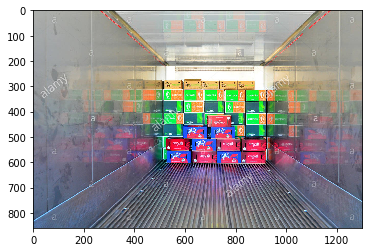

In [540]:
plt.imshow(img)

# 1. Get Hough Lines on input image

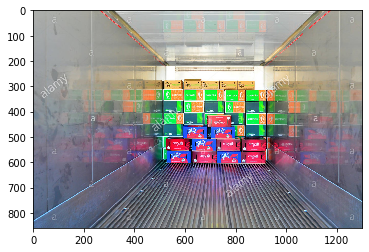

In [541]:
img = cv2.bilateralFilter(img, 5, 20, 20) #Applying Bilateral filter removing noisy little edges
plt.imshow(img)

In [542]:
# Sharpen image
# sharpen_kernel = np.array([[-1,-1,-1], 
#                    [-1, 90,-1],
#                    [-1,-1,-1]])
# img = cv2.filter2D(img, -1, kernel)

In [543]:
edges = cv2.Canny(img, 100, 350, 3)

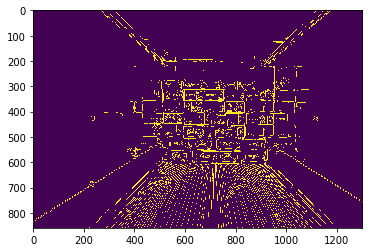

In [544]:
plt.imshow(edges)

In [545]:
edges.shape

(859, 1300)

In [546]:
h_lines = cv2.HoughLinesP(edges, rho = 1, theta = np.pi/4, threshold = 30, minLineLength = 10, maxLineGap = 0)
h_lines.shape

(536, 1, 4)

# Remove horizonal and vertical lines

In [547]:
for i in range(h_lines.shape[0]):
    if(h_lines[i][0][1] == h_lines[i][0][3] or h_lines[i][0][0] == h_lines[i][0][2]):
        h_lines[i][0][0] = 0
        h_lines[i][0][1] = 0
        h_lines[i][0][2] = 0
        h_lines[i][0][3] = 0

In [548]:
img = cv2.imread(input_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for line in h_lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(255,0,0),5)

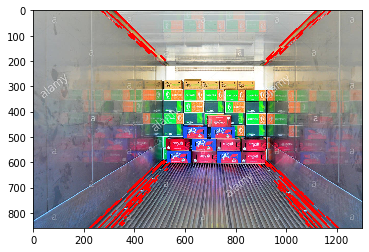

In [549]:
plt.imshow(img)

# 2. Find HOG features

In [550]:
from skimage.feature import hog

In [551]:
fd, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

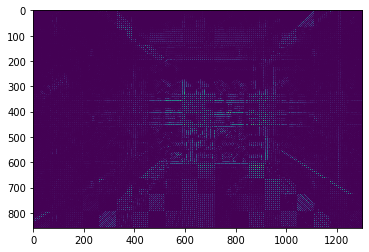

In [552]:
plt.imshow(hog_image)

In [553]:
hog_image.shape

(859, 1300)

# 3. Get Sobel maps

In [554]:
img = cv2.imread(input_file)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [555]:
sobel_kernel=3
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)

In [556]:
gradmag = np.sqrt(sobelx**2 + sobely**2)

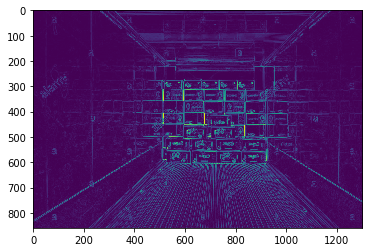

In [557]:
plt.imshow(gradmag)

# 4. Harris corner detection

In [562]:
import cv2
import numpy as np

filename = input_file

img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

# find centroids
ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

# define the criteria to stop and refine the corners
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

In [563]:
corners.shape

(435, 2)

In [564]:
for i in corners:
    cv2.circle(img, (i[0], i[1]), 1, (0,0,255), 5) 

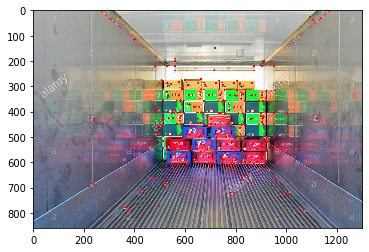

In [565]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))